In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movies_df = pd.read_csv('IMDb movies.csv')
movies_df.head()

/Users/shamduvvuri/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [3]:
movies_df.shape

(85855, 22)

In [4]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85855 non-null  object 
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

In [5]:
movies_df.isnull().sum()

imdb_title_id                0
title                        0
original_title               0
year                         0
date_published               0
genre                        0
duration                     0
country                     64
language                   833
director                    87
writer                    1572
production_company        4455
actors                      69
description               2115
avg_vote                     0
votes                        0
budget                   62145
usa_gross_income         70529
worlwide_gross_income    54839
metascore                72550
reviews_from_users        7597
reviews_from_critics     11797
dtype: int64

## Cleaning Data

In [6]:
# replacing null values in Country column with mode(USA) of country column
movies_df['country'].replace(np.nan,movies_df.country.mode()[0], inplace=True) 

# deleting movies with no director
movies_df.drop(movies_df[movies_df.director.isnull()].index, inplace=True)  

# replacing null values of description with 'Not Available'
movies_df['description'].replace(np.nan, 'Not Available', inplace=True)  

# dropping the columns with maximum null values
movies_df.drop(['budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore'], axis=1, inplace=True) 

In [7]:
# deleting movies with no language
movies_df.drop(movies_df[movies_df.language.isnull()].index, inplace=True)

# deleting movies with no writer
movies_df.drop(movies_df[movies_df.writer.isnull()].index, inplace=True)

# deleting movies with no production company
movies_df.drop(movies_df[movies_df.production_company.isnull()].index, inplace=True)

# deleting movies with no actors
movies_df.drop(movies_df[movies_df.actors.isnull()].index, inplace=True)

# dropping the columns reviews_from_users, reviews_from_critics as the data is not appropriate
movies_df.drop(['reviews_from_critics', 'reviews_from_users'], axis=1, inplace=True)

In [8]:
#not able to convert year column to int as there are erraneous values like 'TV Movie 2019'
# As it is just single row, I prefer to drop it

movies_df.drop(labels= 83917, inplace=True)

In [9]:
# data is clean now, need to convert date columns from object type

movies_df['year'] = movies_df.year.astype('int')
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79467 entries, 0 to 85854
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   imdb_title_id       79467 non-null  object 
 1   title               79467 non-null  object 
 2   original_title      79467 non-null  object 
 3   year                79467 non-null  int64  
 4   date_published      79467 non-null  object 
 5   genre               79467 non-null  object 
 6   duration            79467 non-null  int64  
 7   country             79467 non-null  object 
 8   language            79467 non-null  object 
 9   director            79467 non-null  object 
 10  writer              79467 non-null  object 
 11  production_company  79467 non-null  object 
 12  actors              79467 non-null  object 
 13  description         79467 non-null  object 
 14  avg_vote            79467 non-null  float64
 15  votes               79467 non-null  int64  
dtypes: f

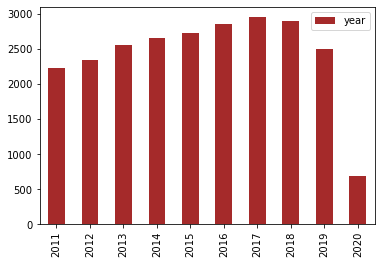

In [10]:
# Movies released count in last 10 years

year_wise_count = movies_df.year.value_counts().sort_index(ascending=False)
movies_by_year = pd.DataFrame(year_wise_count)

#plt.figure(figsize=(8,6))

last_10_years = movies_by_year[:10].sort_index(ascending=True)
last_10_years.plot(kind='bar', color='brown')
# plt.title('Movies released in last 10 years', fontdict={'fontsize': 18,
#         'fontweight': 'bold',
#         'color': 'Red'})
# plt.xlabel('Year', fontdict={'fontsize': 14,
#         'fontweight': 'bold',
#         'color': 'Red'})
# plt.ylabel('Count', fontdict={'fontsize': 14,
#         'fontweight': 'bold',
#         'color': 'Red'})

plt.show()


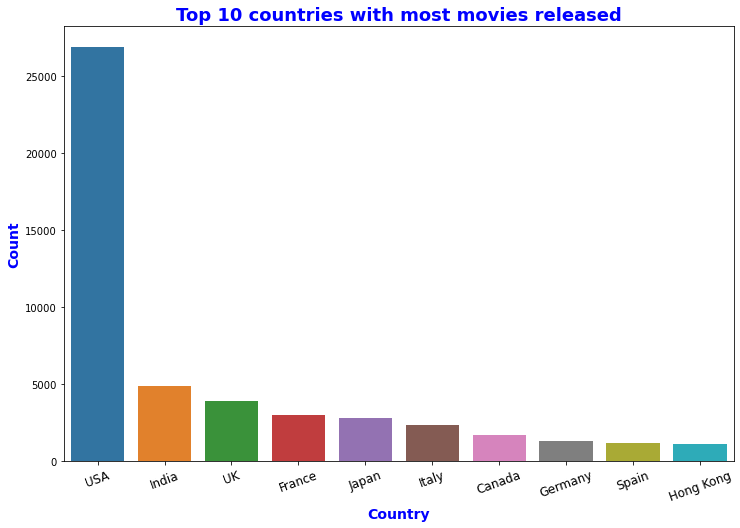

In [11]:
# first 10 countries with most movies published

plt.figure(figsize=(12, 8))

top_countries = movies_df.country.value_counts().sort_values(ascending=False)
country_wise_count = pd.DataFrame(top_countries)
top_10_countries = country_wise_count[:10]


sns.barplot(x=top_10_countries.index, y=top_10_countries.country, data=top_10_countries)
plt.title('Top 10 countries with most movies released', fontdict={'fontsize': 18,
        'fontweight': 'bold',
        'color': 'Blue'})
plt.xlabel('Country', fontdict={'fontsize': 14,
        'fontweight': 'bold',
        'color': 'Blue'})
plt.ylabel('Count', fontdict={'fontsize': 14,
        'fontweight': 'bold',
        'color': 'Blue'})
plt.xticks(rotation='20', size=12)
plt.show()

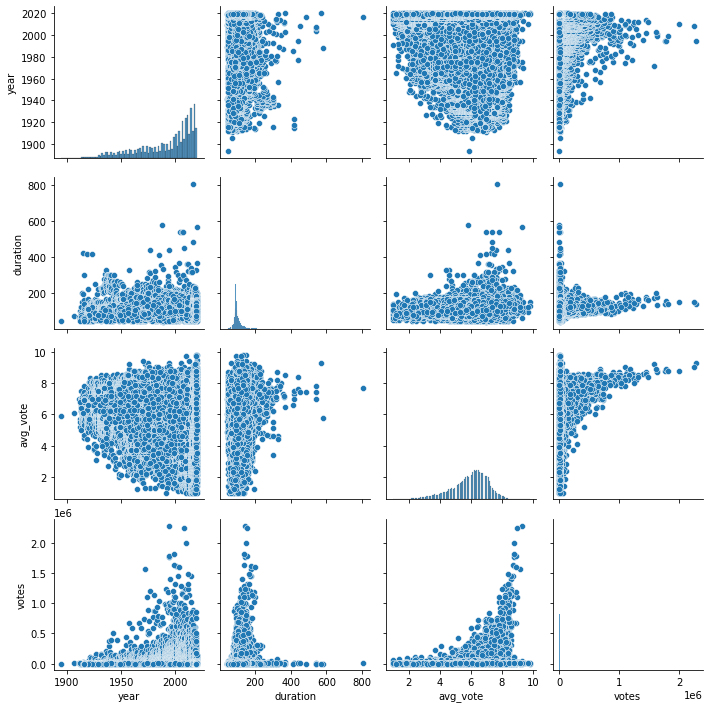

In [12]:
# pair plot

sns.pairplot(movies_df)
plt.show()

In [13]:
movies_df.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237
5,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,Gene Gauntier,Kalem Company,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...","An account of the life of Jesus Christ, based ...",5.7,484


In [14]:
# list of movies with voting > 9

movies_df[movies_df['avg_vote']  >= 9][['title', 'country', 'year', 'director', 'avg_vote']]

,title,country,year,director,avg_vote
15528,Il padrino,USA,1972,Francis Ford Coppola,9.2
16556,Il padrino - Parte II,USA,1974,Francis Ford Coppola,9.0
20502,Maratonci trce pocasni krug,Yugoslavia,1982,Slobodan Sijan,9.0
28453,Le ali della libertà,USA,1994,Frank Darabont,9.3
38245,Maya Bazaar,India,1957,Kadiri Venkata Reddy,9.2
38406,Hababam Sinifi,Turkey,1975,Ertem Egilmez,9.3
38407,Hababam Sinifi Sinifta Kaldi,Turkey,1976,Ertem Egilmez,9.0
38490,Tosun Pasa,Turkey,1976,Kartal Tibet,9.0
38764,Ramayana: The Legend of Prince Rama,"India, Japan",1992,"Ram Mohan, Yûgô Sakô",9.0
40119,Opasen char,Bulgaria,1984,Ivan Andonov,9.0


In [15]:
# list of top 10 directors with highest number of movies

movies_df['director'].value_counts().sort_values(ascending=False).head(10)

Michael Curtiz      84
Jesús Franco        82
Lesley Selander     78
Lloyd Bacon         73
William Beaudine    69
Richard Thorpe      68
Gordon Douglas      64
John Ford           62
Mervyn LeRoy        59
Raoul Walsh         57
Name: director, dtype: int64

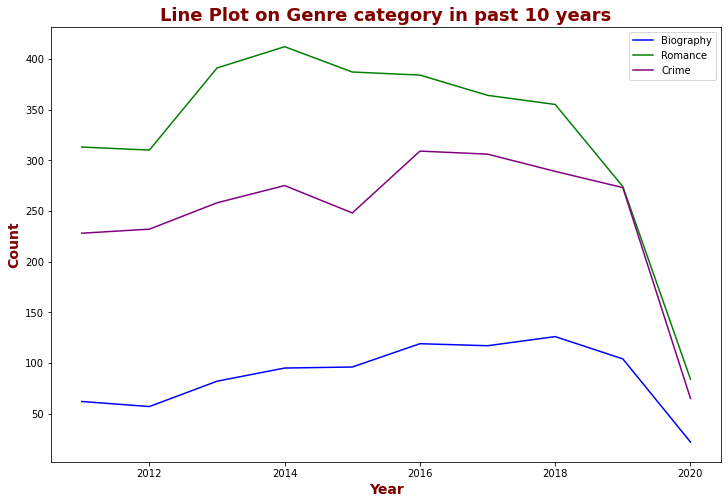

In [16]:
# Biography movies year wise

plt.figure(figsize=(12, 8))

type ='Biography'
movies_df['Biography'] = movies_df['genre'].apply(lambda x: 'y' if type.lower() in x.lower() else 'n')
movies_df[movies_df['Biography'] == 'y']['year'].value_counts().sort_index(ascending=False)[:10].plot(label='Biography', kind='line', color='blue')

plt.title('Line Plot on Genre category in past 10 years', fontdict={'color':'maroon', 'fontweight':'bold', 'fontsize':18})
plt.xlabel('Year', fontdict={'color':'maroon', 'fontweight':'bold', 'fontsize':14})
plt.ylabel('Count', fontdict={'color':'maroon', 'fontweight':'bold', 'fontsize':14})

type ='Romance'
movies_df['Romance'] = movies_df['genre'].apply(lambda x: 'y' if type.lower() in x.lower() else 'n')
movies_df[movies_df['Romance'] == 'y']['year'].value_counts().sort_index(ascending=False)[:10].plot(label='Romance',kind='line', color='green')

type ='Crime'
movies_df['Crime'] = movies_df['genre'].apply(lambda x: 'y' if type.lower() in x.lower() else 'n')
movies_df[movies_df['Crime'] == 'y']['year'].value_counts().sort_index(ascending=False)[:10].plot(label='Crime',kind='line', color='purple')

# type ='Drama'
# movies_df['Drama'] = movies_df['genre'].apply(lambda x: 'y' if type.lower() in x.lower() else 'n')
# movies_df[movies_df['Drama'] == 'y']['year'].value_counts().sort_index(ascending=False)[:10].plot(label='Drama',kind='line', color='red')

plt.legend()

plt.show()

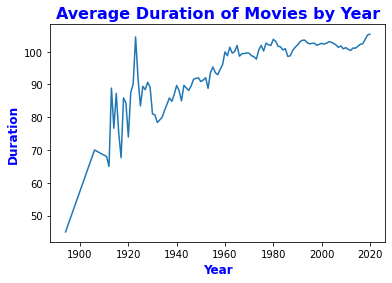

In [17]:
# avg duration by year

avg_duration_df = pd.DataFrame(movies_df.groupby('year').aggregate(np.average)['duration'])
avg_duration_df['duration'] = avg_duration_df.round({'duration': 2})

# plt.figure(figsize=(14, 10))
sns.lineplot(x='year', y='duration', data=avg_duration_df)
plt.title('Average Duration of Movies by Year', size=16, color='Blue', fontweight='bold')
plt.xlabel('Year', size=12, color='Blue', fontweight='bold' )
plt.ylabel('Duration', size=12, color='Blue', fontweight='bold' )

plt.show()

In [25]:
movies_by_year.head().to_pickle('./movie_pickle.pkl')